# **Expeiment Part A: Utilizing Pre-Trained Feature Layers in Adjacent Tasks**

### **Experiment 1 End-to-End Classification (Color Images)**


Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 1.6651 - accuracy: 0.3929 - val_loss: 1.3346 - val_accuracy: 0.5162
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 1.2790 - accuracy: 0.5466 - val_loss: 1.0987 - val_accuracy: 0.6202
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 1.1063 - accuracy: 0.6092 - val_loss: 0.9547 - val_accuracy: 0.6650
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9936 - accuracy: 0.6536 - val_loss: 0.8938 - val_accuracy: 0.6924
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9030 - accuracy: 0.6886 - val_loss: 0.8303 - val_accuracy: 0.7120
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8296 - accuracy: 0.7124 - val_loss: 0.8123 - val_accuracy: 0.7183
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.7764 - accuracy: 0.7302 - val_loss: 0.7814 - val_accuracy: 0.7291
Epoch 

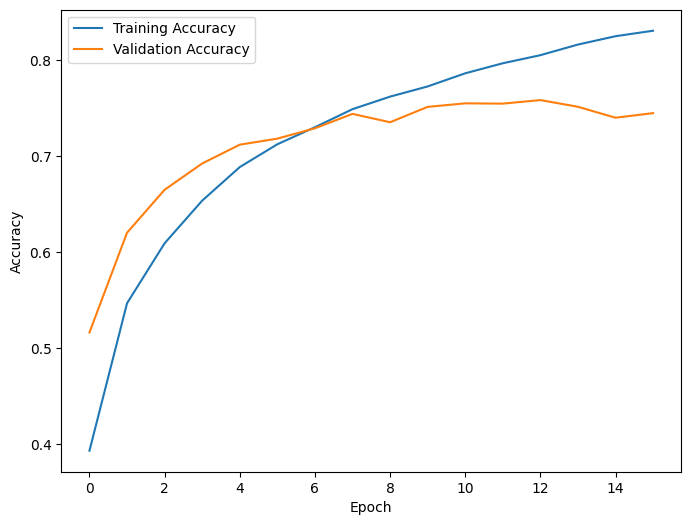

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding of labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential([
   Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
   MaxPooling2D((2, 2)),
   Conv2D(64, (3, 3), activation='relu', padding='same'),
   MaxPooling2D((2, 2)),
   Conv2D(128, (3, 3), activation='relu', padding='same'),
   MaxPooling2D((2, 2)),
   Flatten(),
   Dense(128, activation='relu'),
   Dropout(0.5),
   Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stop, checkpoint])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('cifar10_model.h5')

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Experiment 2 Transfer Learning**

In [4]:
# VGG19
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model

# Load pre-trained VGG19 model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
vgg19_model.trainable = False

# Add classification layers for CIFAR-10
x = vgg19_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
vgg19_cifar10_model = Model(inputs=vgg19_model.input, outputs=output)

# Compile and train the model
vgg19_cifar10_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg19_cifar10_history = vgg19_cifar10_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
vgg19_cifar10_test_acc = vgg19_cifar10_model.evaluate(x_test, y_test, verbose=0)[1]
print(f'VGG19 CIFAR-10 Test accuracy: {vgg19_cifar10_test_acc * 100:.2f}%')

Epoch 1/20
782/782 [==============================] - 18s 19ms/step - loss: 1.5032 - accuracy: 0.4698 - val_loss: 1.3074 - val_accuracy: 0.5451
Epoch 2/20
782/782 [==============================] - 14s 18ms/step - loss: 1.3267 - accuracy: 0.5336 - val_loss: 1.2360 - val_accuracy: 0.5643
Epoch 3/20
782/782 [==============================] - 13s 17ms/step - loss: 1.2676 - accuracy: 0.5530 - val_loss: 1.2141 - val_accuracy: 0.5719
Epoch 4/20
782/782 [==============================] - 12s 16ms/step - loss: 1.2321 - accuracy: 0.5654 - val_loss: 1.1935 - val_accuracy: 0.5812
Epoch 5/20
782/782 [==============================] - 12s 16ms/step - loss: 1.2022 - accuracy: 0.5760 - val_loss: 1.1814 - val_accuracy: 0.5856
Epoch 6/20
782/782 [==============================] - 12s 16ms/step - loss: 1.1819 - accuracy: 0.5837 - val_loss: 1.1566 - val_accuracy: 0.5904
Epoch 7/20
782/782 [==============================] - 12s 16ms/step - loss: 1.1628 - accuracy: 0.5894 - val_loss: 1.1702 - val_accuracy:

In [7]:
# ResNet50
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
resnet50_model.trainable = False

# Add classification layers for CIFAR-10
x = resnet50_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
resnet50_cifar10_model = Model(inputs=resnet50_model.input, outputs=output)

# Compile and train the model
resnet50_cifar10_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_cifar10_history = resnet50_cifar10_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
resnet50_cifar10_test_acc = resnet50_cifar10_model.evaluate(x_test, y_test, verbose=0)[1]
print(f'ResNet50 CIFAR-10 Test accuracy: {resnet50_cifar10_test_acc * 100:.2f}%')

Epoch 1/20
782/782 [==============================] - 21s 23ms/step - loss: 2.2309 - accuracy: 0.1607 - val_loss: 2.0700 - val_accuracy: 0.2260
Epoch 2/20
782/782 [==============================] - 12s 16ms/step - loss: 2.1180 - accuracy: 0.1956 - val_loss: 2.0495 - val_accuracy: 0.2506
Epoch 3/20
782/782 [==============================] - 13s 17ms/step - loss: 2.0872 - accuracy: 0.2085 - val_loss: 1.9786 - val_accuracy: 0.2869
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 2.0666 - accuracy: 0.2189 - val_loss: 1.9387 - val_accuracy: 0.2899
Epoch 5/20
782/782 [==============================] - 12s 15ms/step - loss: 2.0557 - accuracy: 0.2217 - val_loss: 1.9464 - val_accuracy: 0.2996
Epoch 6/20
782/782 [==============================] - 13s 17ms/step - loss: 2.0494 - accuracy: 0.2287 - val_loss: 1.9200 - val_accuracy: 0.3094
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 2.0342 - accuracy: 0.2354 - val_loss: 1.9191 - val_accuracy:

### **Experiment 3 Fine-tuning**

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import csv
import os

# Clone the GitHub repository
!git clone https://github.com/seshuad/IMagenet
!ls 'IMagenet/tiny-imagenet-200/'

# Normalize pixel values
def preprocess_input(x):
    return x / 255.0

# Load the Tiny ImageNet dataset
train_dir = 'IMagenet/tiny-imagenet-200/train'
val_dir = 'IMagenet/tiny-imagenet-200/val'
input_shape = (64, 64, 3)  # Adjust input shape to match the images

if not os.path.exists(train_dir) or not os.path.exists(val_dir):
    raise FileNotFoundError("The directory paths provided for Tiny ImageNet dataset are incorrect.")

tiny_imagenet_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
tiny_imagenet_train_generator = tiny_imagenet_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=64,
    class_mode='categorical')

tiny_imagenet_test_generator = tiny_imagenet_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=64,
    class_mode='categorical')

# Build the custom model for Tiny ImageNet
custom_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(200, activation='softmax')  # Adjusted output layer for 200 classes
])

# Compile the model
custom_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on Tiny ImageNet
epochs = 20
custom_tiny_history = custom_model.fit(tiny_imagenet_train_generator,
                                       epochs=epochs,
                                       validation_data=tiny_imagenet_test_generator)

# Evaluate the model on the test set
custom_tiny_test_acc = custom_tiny_history.history['val_accuracy'][-1]
print(f'Custom Tiny ImageNet Test accuracy: {custom_tiny_test_acc * 100:.2f}%')

# Save the fine-tuned model
custom_model.save('custom_tiny_model.h5')


fatal: destination path 'IMagenet' already exists and is not an empty directory.
test  train  val  wnids.txt  words.txt
Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 1 classes.


Epoch 1/20
1563/1563 [==============================] - 52s 32ms/step - loss: 4.9402 - accuracy: 0.0314 - val_loss: 1229.3889 - val_accuracy: 0.0314
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 4.4400 - accuracy: 0.0768 - val_loss: 1338.9880 - val_accuracy: 0.0064
Epoch 3/20
1563/1563 [==============================] - 47s 30ms/step - loss: 4.2009 - accuracy: 0.1053 - val_loss: 1395.7725 - val_accuracy: 0.0093
Epoch 4/20
1563/1563 [==============================] - 46s 30ms/step - loss: 4.0687 - accuracy: 0.1191 - val_loss: 1459.4930 - val_accuracy: 0.0107
Epoch 5/20
1563/1563 [==============================] - 48s 31ms/step - loss: 3.9713 - accuracy: 0.1337 - val_loss: 1517.0670 - val_accuracy: 0.0075
Epoch 6/20
1563/1563 [==============================] - 47s 30ms/step - loss: 3.8909 - accuracy: 0.1454 - val_loss: 1503.0194 - val_accuracy: 0.0060
Epoch 7/20
1563/1563 [==============================] - 47s 30ms/step - loss: 3.8227 - accuracy: 0.1540 - 

### **Experiment 4 Memory Loss or Functional Gain**

In [33]:
# Load the fine-tuned model from Experiment 3
custom_tiny_model = load_model('custom_tiny_model.h5')

# Evaluate the fine-tuned model on CIFAR-10 test set
# Evaluate the fine-tuned model on the Tiny ImageNet test set
custom_tiny_test_acc = custom_tiny_model.evaluate(tiny_imagenet_test_generator, verbose=0)[1]
print(f'Custom Tiny ImageNet Test accuracy: {custom_tiny_test_acc * 100:.2f}%')

Custom Tiny ImageNet Test accuracy: 0.74%


### **Evaluation & Comaprsion**

In [35]:
import csv

# Create a CSV file and open it for writing
csv_file = open('experiment_results.csv', 'w', newline='')
csv_writer = csv.writer(csv_file)

# Write the header row
csv_writer.writerow(['Experiment', 'Model', 'Dataset', 'Train Accuracy', 'Test Accuracy'])

# Experiment 1: Custom CNN model
# Assuming you have the training history and test accuracy stored in variables
custom_train_acc = history.history['accuracy'][-1]
custom_test_acc = test_acc
csv_writer.writerow(['1', 'Custom CNN', 'CIFAR-10', custom_train_acc, custom_test_acc])

# Experiment 2: Transfer Learning
# VGG19
vgg19_train_acc = vgg19_cifar10_history.history['accuracy'][-1]
vgg19_test_acc = vgg19_cifar10_test_acc
csv_writer.writerow(['2', 'VGG19', 'CIFAR-10', vgg19_train_acc, vgg19_test_acc])

# ResNet50
resnet50_train_acc = resnet50_cifar10_history.history['accuracy'][-1]
resnet50_test_acc = resnet50_cifar10_test_acc
csv_writer.writerow(['2', 'ResNet50', 'CIFAR-10', resnet50_train_acc, resnet50_test_acc])

# Experiment 3: Fine-tuning
custom_tiny_train_acc = custom_tiny_history.history['accuracy'][-1]
custom_tiny_test_acc = custom_tiny_test_acc
csv_writer.writerow(['3', 'Custom Fine-tuned', 'Tiny ImageNet', custom_tiny_train_acc, custom_tiny_test_acc])

# Experiment 4: Memory Loss or Functional Gain
custom_tiny_test_acc = custom_tiny_model.evaluate(tiny_imagenet_test_generator, verbose=0)[1]
csv_writer.writerow(['4', 'Custom Fine-tuned', 'CIFAR-10', '-', custom_tiny_test_acc])

# Close the CSV file
csv_file.close()

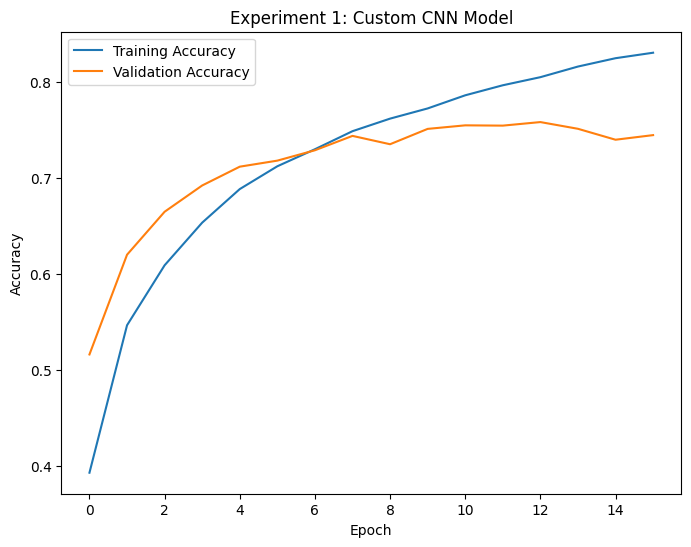

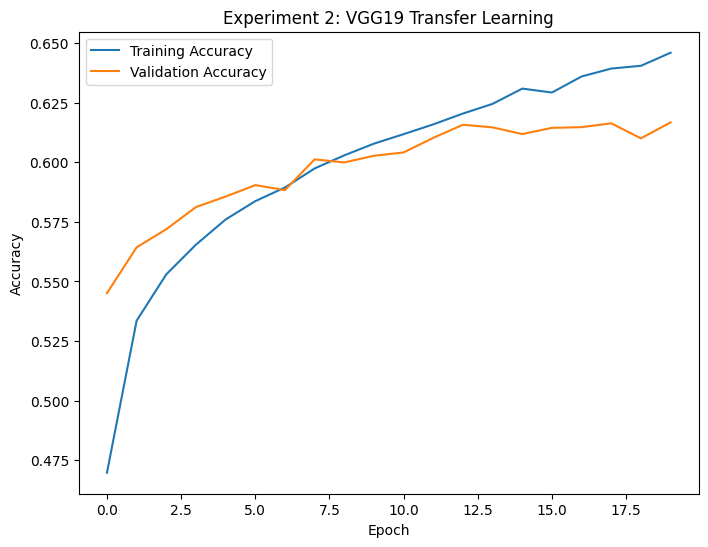

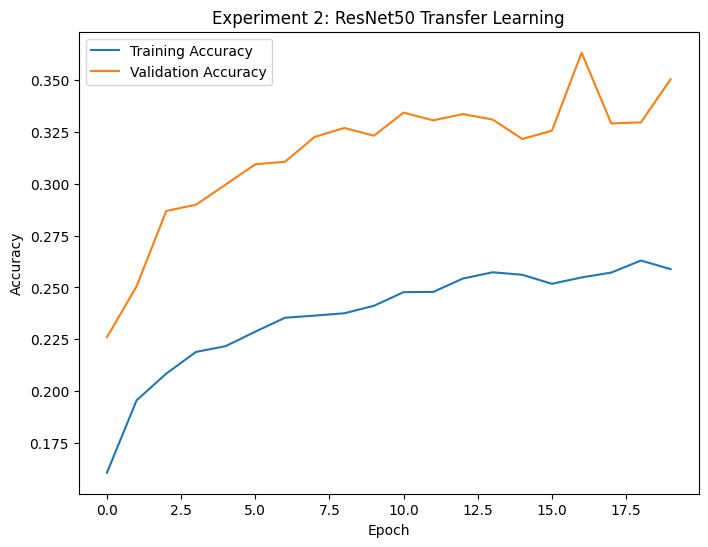

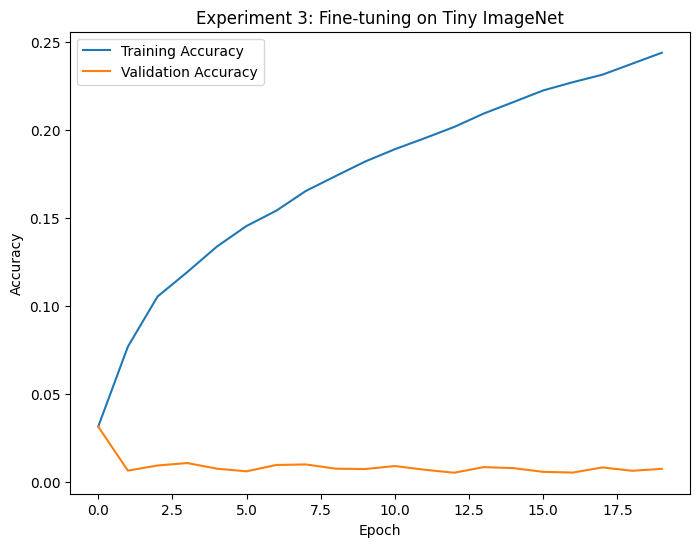

In [36]:
import matplotlib.pyplot as plt

# Experiment 1: Custom CNN model
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Experiment 1: Custom CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment 2: Transfer Learning
# VGG19
plt.figure(figsize=(8, 6))
plt.plot(vgg19_cifar10_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg19_cifar10_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Experiment 2: VGG19 Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ResNet50
plt.figure(figsize=(8, 6))
plt.plot(resnet50_cifar10_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet50_cifar10_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Experiment 2: ResNet50 Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment 3: Fine-tuning
plt.figure(figsize=(8, 6))
plt.plot(custom_tiny_history.history['accuracy'], label='Training Accuracy')
plt.plot(custom_tiny_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Experiment 3: Fine-tuning on Tiny ImageNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()